In [53]:
import io
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import _pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

dir_ = "/Users/meryemmhamdi/Documents/Rig1/meryemRig1/home/meryem/meryem/Results/TranslationMatrices/"

In [74]:
print("Loading SRC de_en embeddings to file:")
with open(dir_ +"de_en_SRC.p", "rb") as file:
    de_en_src = pkl.load(file, encoding="latin1")

print("Loading TRG de_en embeddings to file:")
with open(dir_+"de_en_TRG.p", "rb") as file:
    de_en_trg = pkl.load(file, encoding="latin1")

###########
print("Loading SRC fr_en embeddings to file:")
with open(dir_+"fr_en_SRC.p", "rb") as file:
    fr_en_src = pkl.load(file, encoding="latin1")

print("Loading TRG fr_en embeddings to file:")
with open(dir_+"fr_en_TRG.p", "rb") as file:
    fr_en_trg = pkl.load(file, encoding="latin1")


########
print("Loading SRC it_en embeddings to file:")
with open(dir_+"it_en_SRC.p", "rb") as file:
    it_en_src = pkl.load(file, encoding="latin1")

print("Loading TRG it_en embeddings to file:")
with open(dir_+"it_en_TRG.p", "rb") as file:
    it_en_trg = pkl.load(file, encoding="latin1")

Loading SRC de_en embeddings to file:
Loading TRG de_en embeddings to file:
Loading SRC fr_en embeddings to file:
Loading TRG fr_en embeddings to file:
Loading SRC it_en embeddings to file:
Loading TRG it_en embeddings to file:


In [16]:
def intersection(lst1, lst2, lst3):
    lst4_indices = []
    lst4_words = []
    lst4_vecs = []
    for i, value in enumerate(lst1):
        if value in lst2 and value in lst3:
            lst4_indices.append(i)
            lst4_words.append(value[0])
            lst4_vecs.append(value[1])
    return lst4_indices, lst4_words, lst4_vecs

def intersection_2(lst1, lst2):
    lst4_indices = []
    lst4_words = []
    lst4_vecs = []
    lst4_word2ids = {}
    lst_2_list = [word for word, vec in lst2]
    for i, value in enumerate(lst1):
        if value[0] in lst_2_list:
            lst4_indices.append(i)
            lst4_words.append(value[0])
            lst4_vecs.append(value[1])
            lst4_word2ids.update({value[0]:i})
    return lst4_indices, lst4_words, lst4_vecs, lst4_word2ids

In [81]:
for k, value in enumerate(de_en_trg):
    print(value[0])

autonomous
inch
showed
read
miracle
legal
regime
fingers
renovation
secrets
andy
java
alfons
hiding
est
catholics
reichstag
provider
punishment
guilders
laterally
planet
mozart
chairmanship
dreams
alliance
pietro
baroque
circles
pilot
depicted
universal
cruz
died
job
geology
pius
colonies
lausanne
campaign
nba
detail
problematic
histoire
airlines
calendar
landesamt
blog
painter
invention
xii
neck
centuries
starring
piano
johan
margaret
weekends
arizona
franklin
coalition
comic
sculpture
interpreted
rue
inform
chinese
seminar
substance
generations
janeiro
vancouver
filming
auditorium
ronald
negative
voluntarily
minorities
entitles
peters
klagenfurt
copper
lincoln
sandstone
field
brands
studying
nighttime
fish
schiller
fourth
sven
urges
clothing
permission
norman
siemens
mini
ernest
buried
cruiser
earthquake
puerto
celebration
locomotive
conjecture
propaganda
knowledge
southern
oswald
assigned
secret
strangers
trucks
registered
magdalena
donations
monarchy
republican
freshly
kelly
alabam

In [101]:
from tqdm import tqdm
en_emb_vecs = []
de_emb_vecs = []
fr_emb_vecs = []
it_emb_vecs = []

en_emb_words = []
de_emb_words = []
fr_emb_words = []
it_emb_words = []

en_word2ids = {}
de_word2ids = {}
fr_word2ids = {}
it_word2ids = {}

for i, value in tqdm(enumerate(fr_en_trg)):
    for j, value2 in enumerate(it_en_trg):
        for k, value3 in enumerate(de_en_trg):
            if value[0] == value2[0] and value[0] == value3[0]:
                en_emb_words.append(value[0])
                en_emb_vecs.append(value[1])
                en_word2ids[value[0]] = len(en_word2ids)

                fr_emb_words.append(fr_en_src[i][0])
                fr_emb_vecs.append(fr_en_src[i][1])
                fr_word2ids[fr_en_src[i][0]] = len(fr_word2ids)

                it_emb_words.append(it_en_src[j][0])
                it_emb_vecs.append(it_en_src[j][1])
                it_word2ids[it_en_src[j][0]] = len(it_word2ids)
            
                de_emb_words.append(de_en_src[k][0])
                de_emb_vecs.append(de_en_src[k][1])
                de_word2ids[de_en_src[k][0]] = len(de_word2ids)
            

500it [00:20, 24.17it/s]


In [90]:
pca = TSNE(n_components=2, n_iter=3000, verbose=2) #PCA(n_components=2, whiten=True) 
pca.fit(np.vstack([en_emb_vecs, fr_emb_vecs, de_emb_vecs]))
#print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())


[t-SNE] Computing 74 nearest neighbors...
[t-SNE] Indexed 75 samples in 0.000s...
[t-SNE] Computed neighbors for 75 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 75 / 75
[t-SNE] Mean sigma: 2.760786
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 53.5675316, gradient norm = 0.5412274 (50 iterations in 0.051s)
[t-SNE] Iteration 100: error = 55.0470505, gradient norm = 0.5194482 (50 iterations in 0.052s)
[t-SNE] Iteration 150: error = 51.7738876, gradient norm = 0.5580130 (50 iterations in 0.057s)
[t-SNE] Iteration 200: error = 52.9873238, gradient norm = 0.4734181 (50 iterations in 0.052s)
[t-SNE] Iteration 250: error = 53.4407349, gradient norm = 0.5377934 (50 iterations in 0.051s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.440735
[t-SNE] Iteration 300: error = 1.0842235, gradient norm = 0.0082334 (50 iterations in 0.051s)
[t-SNE] Iteration 350: error = 1.0250471, gradient norm = 0.0035928 (50 i

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=3000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=2)

[t-SNE] Computing 44 nearest neighbors...
[t-SNE] Indexed 45 samples in 0.000s...
[t-SNE] Computed neighbors for 45 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 45 / 45
[t-SNE] Mean sigma: 3.451437
[t-SNE] Computed conditional probabilities in 0.002s
[t-SNE] Iteration 50: error = 50.3303680, gradient norm = 0.5294640 (50 iterations in 0.029s)
[t-SNE] Iteration 100: error = 49.7742500, gradient norm = 0.4538244 (50 iterations in 0.027s)
[t-SNE] Iteration 150: error = 50.6558075, gradient norm = 0.3946330 (50 iterations in 0.030s)
[t-SNE] Iteration 200: error = 46.9188690, gradient norm = 0.5497844 (50 iterations in 0.029s)
[t-SNE] Iteration 250: error = 48.6002312, gradient norm = 0.4289389 (50 iterations in 0.027s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.600231
[t-SNE] Iteration 300: error = 0.9642721, gradient norm = 0.0013176 (50 iterations in 0.029s)
[t-SNE] Iteration 350: error = 0.8451902, gradient norm = 0.0005019 (50 i

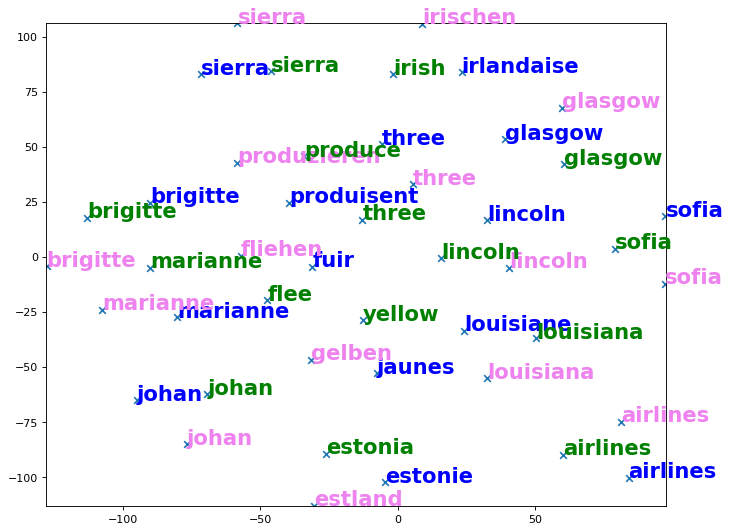

In [100]:
def plot_similar_word(fr_words, fr_emb, word2id_fr, de_words, de_emb, word2id_de, tgt_words, tgt_emb, word2id_en, pca):#(de_words, de_emb, fr_words, fr_emb, it_words, it_emb, tgt_words, tgt_emb, pca):

    Y = []
    word_labels = []
    """
    for sw in de_words:
        Y.append(de_emb[i])
        word_labels.append(sw)

    """
    for sw in fr_words:
        Y.append(fr_emb[word2id_fr[sw]])
        word_labels.append(sw)
    for sw in de_words:
        Y.append(de_emb[word2id_de[sw]])
        word_labels.append(sw)

    for tw in tgt_words:
        Y.append(tgt_emb[word2id_en[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.fit_transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        if k < len(fr_words):
            color = "blue"
        elif k < len(fr_words) + len(de_words):
            color = "violet"
        else:
            color = "green"
        # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    #plt.title('Visualization of the multilingual word embedding space')

    plt.show()
    plt.savefig('vizembeddings.png')

en_words = en_emb_words[10:30]#["translations", "yesterday", "feelings", "survivors", "terror", "worlds"] #
fr_words = fr_emb_words[10:30]#["traductions", "hier", "sentiments", "survivants", "terreur", "mondes"] #fr_emb_words
de_words = de_emb_words[10:30]#["traduzioni", "ieri", "sentimento", "sopravvissuti", "terrore", "mondi"] #it_emb_words 
plot_similar_word(fr_words, fr_emb_vecs, fr_word2ids, de_words, de_emb_vecs, de_word2ids, en_words, en_emb_vecs, en_word2ids, pca)


In [103]:
print(en_emb_words)

['kiev', 'dublin', 'sierra']


In [102]:
print(de_emb_words)

['kiew', 'dublin', 'sierra']


In [104]:
print(fr_emb_words)

['kiev', 'dublin', 'sierra']


In [105]:
print(it_emb_words)

['kiev', 'dublino', 'sierra']
